In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import recall_score, f1_score, roc_curve, auc, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Random Forest

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
clf_rf = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_split=5,random_state=42)

clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)

In [23]:
# Cross Validation RF
cv=10
scores_rf = cross_val_score(clf_rf, X, y, cv=cv)
av_score_rf= sum(scores_rf)/cv
print(av_score_rf)

0.9666666666666665


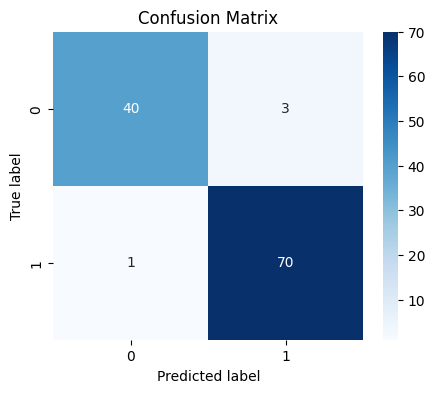

In [12]:
cm=confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Accuracy score RF
accuracy_rf=accuracy_score(y_test, y_pred_rf)
print("Accuracy score for RF:",accuracy_rf)

# Precision score RF
precision_rf=precision_score(y_test, y_pred_rf, average=None)
print("Precision score for RF:",precision_rf)

# Recall score RF
recall_rf=recall_score(y_test, y_pred_rf, average=None)
print("Recall score for RF:",recall_rf)

# F1 score RF
f1_rf = f1_score(y_test, y_pred_rf, average=None)
print("F1 score for RF:",f1_rf)

# auc RF
y_scores_rf = clf_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rf)
auc_rf = auc(fpr, tpr)
print("AUC for RF:",auc_rf)

Accuracy score for RF: 0.9649122807017544
Precision score for RF: [0.97560976 0.95890411]
Recall score for RF: [0.93023256 0.98591549]
F1 score for RF: [0.95238095 0.97222222]
AUC for RF: 0.9944317065181788


# SMO

In [16]:
# SVM Model Training & Testing
clf_svm=svm.SVC(kernel='rbf', C=10, gamma='auto',random_state=42)
clf_svm.fit(X_train, y_train)

y_scores_svm = clf_svm.decision_function(X_test)

y_pred_svm = (y_scores_svm > 0).astype(int)

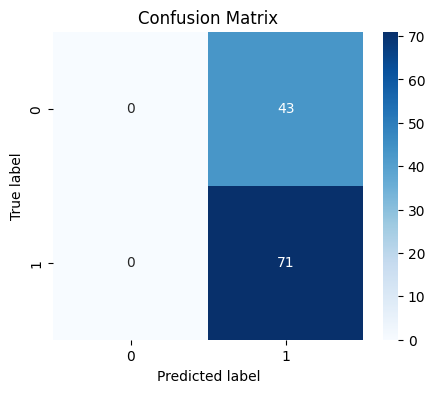

In [17]:
cm=confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Accuracy score RF
accuracy_svm=accuracy_score(y_test, y_pred_svm)
print("Accuracy score for RF:",accuracy_svm)

# Precision score RF
precision_svm=precision_score(y_test, y_pred_svm, average=None)
print("Precision score for RF:",precision_svm)

# Recall score RF
recall_svm=recall_score(y_test, y_pred_svm, average=None)
print("Recall score for RF:",recall_svm)

# F1 score RF
f1_svm = f1_score(y_test, y_pred_svm, average=None)
print("F1 score for RF:",f1_svm)

# auc RF
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svm)
auc_svm = auc(fpr, tpr)
print("AUC for RF:",auc_svm)

Accuracy score for RF: 0.6228070175438597
Precision score for RF: [0.         0.62280702]
Recall score for RF: [0. 1.]
F1 score for RF: [0.         0.76756757]
AUC for RF: 0.9367834916475599


c:\Users\anama\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
